In [2]:
import os
import pandas as pd
import glob 
from datetime import datetime #타임스탬프 시간으로

from sklearn.cluster import DBSCAN


In [3]:
# df = pd.read_csv('C:\\논문코드\\dict12.csv') #유저와 디바이스 관계
def process_string(value):
    number = value.strip('()')  # 괄호 제거
    return str(number)


df = pd.read_csv('C:\\논문코드\\dict13.csv', converters={'pattern': process_string})


In [4]:
# print(df)
df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)
df.dtypes
df['X'] = df.pattern.str.split(',').str[0]
df['Y'] = df.pattern.str.split(',').str[1]
data = df[['X', 'Y']]
# print(data)
print(df)

        user time pattern   X    Y
0        685    M  49, 38  49   38
1        685    M  49, 37  49   37
2        685    M  49, 40  49   40
3        685    M  18, 45  18   45
4        685    M  52, 39  52   39
...      ...  ...     ...  ..  ...
202801  2334    E  26, 44  26   44
202802  2334    E  13, 32  13   32
202803  2334    E  14, 27  14   27
202804  2334    E  14, 32  14   32
202805  2334    E  15, 37  15   37

[202806 rows x 5 columns]


In [7]:
df_user_cluster = pd.DataFrame()


for i in range(1,4001):
    grouped = df.groupby('user')
    user_id_data = grouped.get_group(i)
    user_xy = user_id_data[['X', 'Y']]
    model = DBSCAN(eps=1, min_samples=2)

    # 군집화 모델 학습 및 클러스터 예측 결과 반환
    model.fit(user_xy)
    user_id_data['cluster'] = model.fit_predict(user_xy)
    
    df_user_cluster = pd.concat([df_user_cluster, user_id_data], axis=0)

    # print(user_id_data)
    

# print(user_xy)

C:\Users\user\AppData\Local\Temp\ipykernel_17008\768288904.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_id_data['cluster'] = model.fit_predict(user_xy)
C:\Users\user\AppData\Local\Temp\ipykernel_17008\768288904.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_id_data['cluster'] = model.fit_predict(user_xy)
C:\Users\user\AppData\Local\Temp\ipykernel_17008\768288904.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

In [9]:
print(df_user_cluster)
df_user_cluster.to_csv('dbscan2.csv', index=False)


        user time pattern   X    Y  cluster
170876     1    M   1, 43   1   43        0
170877     1    M   8, 45   8   45       -1
170878     1    M   2, 55   2   55       -1
170879     1    M   4, 45   4   45        1
170880     1    M  38, 57  38   57       -1
...      ...  ...     ...  ..  ...      ...
91005   4000    E  38, 65  38   65        0
91006   4000    E  61, 38  61   38       -1
91007   4000    E  37, 63  37   63       -1
91008   4000    E  23, 47  23   47       -1
91009   4000    E  24, 35  24   35       -1

[202806 rows x 6 columns]


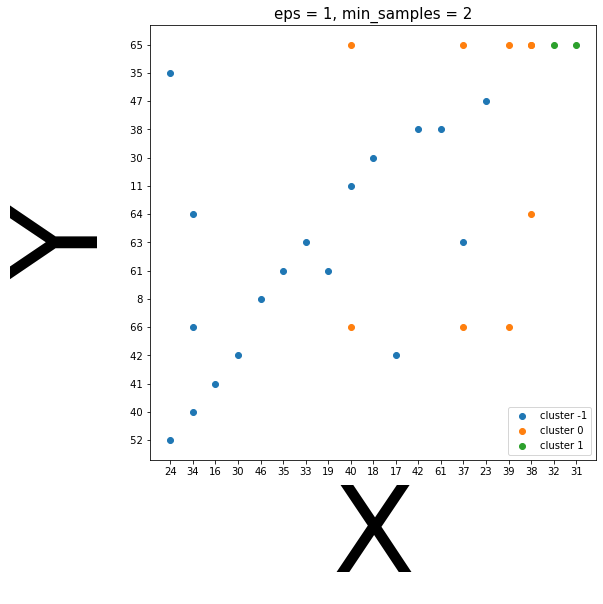

In [10]:
# import matplotlib.pyplot as plt

# plt.figure(figsize = (8, 8))

# # 이상치 번호는 -1, 클러스터 최대 숫자까지 iteration
# for i in range(-1, user_id_data['cluster'].max() + 1):
#     plt.scatter(user_id_data.loc[user_id_data['cluster'] == i, 'X'], user_id_data.loc[user_id_data['cluster'] == i, 'Y'], 
#                     label = 'cluster ' + str(i))

# plt.legend()
# plt.title('eps = 1, min_samples = 2', size = 15)
# plt.xlabel('X', size = 120)
# plt.ylabel('Y', size = 120)
# plt.show()